Below is code with a link to a happy or sad dataset which contains 80 images, 40 happy and 40 sad. 
Create a convolutional neural network that trains to 100% accuracy on these images,  which cancels training upon hitting training accuracy of >.999

Hint -- it will work best with 3 convolutional layers.

In [1]:
import tensorflow as tf
import os
import zipfile
from os import path, getcwd, chdir

# DO NOT CHANGE THE LINE BELOW. If you are developing in a local
# environment, then grab happy-or-sad.zip from the Coursera Jupyter Notebook
# and place it inside a local folder and edit the path to that location
path = f"{getcwd()}/../tmp2/happy-or-sad.zip"

zip_ref = zipfile.ZipFile(path, 'r')
zip_ref.extractall("/tmp/h-or-s")
zip_ref.close()

In [6]:
# Directory with our training horse pictures
train_happy_dir = os.path.join('/tmp/h-or-s/happy')

# Directory with our training human pictures
train_sad_dir = os.path.join('/tmp/h-or-s/sad')

In [7]:
train_happy_names = os.listdir(train_happy_dir)
print(train_happy_names[:10])

train_sad_names = os.listdir(train_sad_dir)
print(train_sad_names[:10])

['happy1-05.png', 'happy2-06.png', 'happy1-04.png', 'happy2-16.png', 'happy1-16.png', 'happy1-15.png', 'happy2-02.png', 'happy1-19.png', 'happy1-14.png', 'happy2-03.png']
['sad1-08.png', 'sad2-03.png', 'sad1-16.png', 'sad2-11.png', 'sad1-06.png', 'sad1-17.png', 'sad1-18.png', 'sad2-10.png', 'sad1-09.png', 'sad2-19.png']


In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

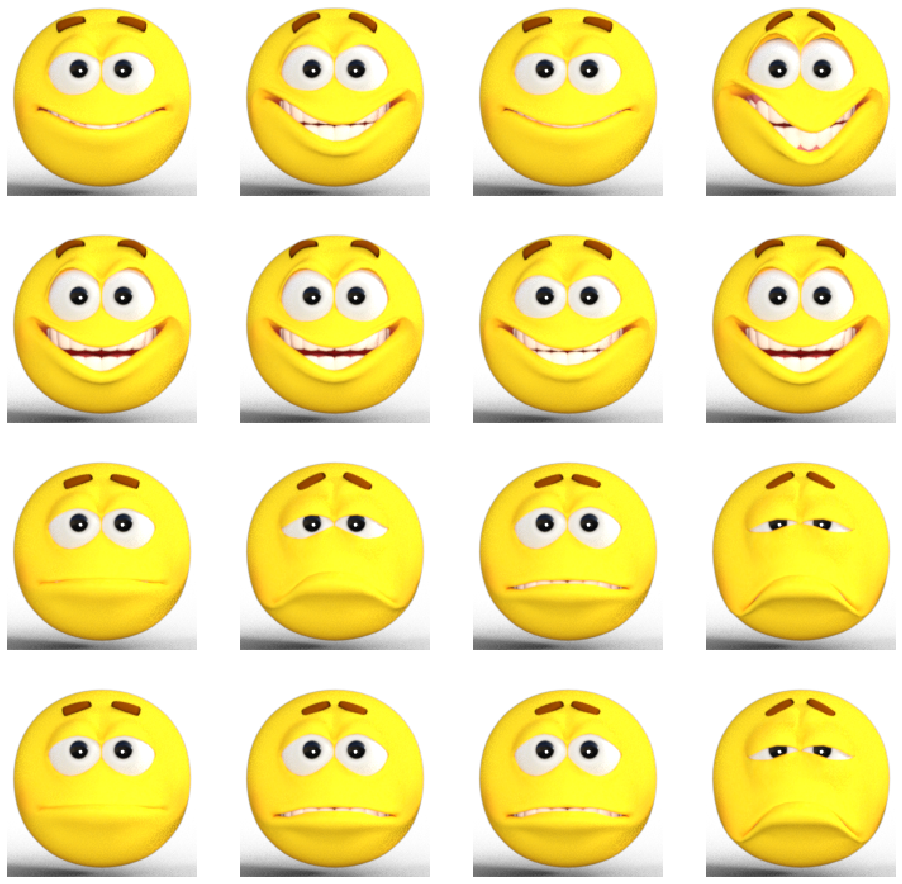

In [11]:
# Set up matplotlib fig, and size it to fit 4x4 pics

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_happy_pix = [os.path.join(train_happy_dir, fname) 
                for fname in train_happy_names[pic_index-8:pic_index]]
next_sad_pix = [os.path.join(train_sad_dir, fname) 
                for fname in train_sad_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_happy_pix+next_sad_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [2]:
# GRADED FUNCTION: train_happy_sad_model
def train_happy_sad_model():
    # Please write your code only where you are indicated.
    # please do not remove # model fitting inline comments.

    DESIRED_ACCURACY = 0.999

    class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('acc')>DESIRED_ACCURACY):
                print("\nReached 99.99% accuracy so cancelling training!")
                self.model.stop_training = True
         

    callback = myCallback()
    
    # This Code Block should Define and Compile the Model. Please assume the images are 150 X 150 in your implementation.
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        # The second convolution
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        # The third convolution
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        # The fourth convolution
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        # The fifth convolution
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        # Flatten the results to feed into a DNN
        tf.keras.layers.Flatten(),
        # 512 neuron hidden layer
        tf.keras.layers.Dense(512, activation='relu'),
        # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
        tf.keras.layers.Dense(1, activation='sigmoid')
       
    ])

    from tensorflow.keras.optimizers import RMSprop

    model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])
        

    # This code block should create an instance of an ImageDataGenerator called train_datagen 
    # And a train_generator by calling train_datagen.flow_from_directory

    from tensorflow.keras.preprocessing.image import ImageDataGenerator

    train_datagen = ImageDataGenerator(rescale=1/255)

    # Please use a target_size of 150 X 150.
    train_generator = train_datagen.flow_from_directory(
        '/tmp/h-or-s',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')
    # Expected output: 'Found 80 images belonging to 2 classes'

    # This code block should call model.fit_generator and train for
    # a number of epochs.
    # model fitting
    history = model.fit_generator(
          train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,callbacks = [callback])
    # model fitting
    return history.history['acc'][-1]

In [3]:
# The Expected output: "Reached 99.9% accuracy so cancelling training!""
train_happy_sad_model()

W0209 18:42:35.336715 140059564664640 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0209 18:42:35.928376 140059564664640 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Found 80 images belonging to 2 classes.
Epoch 1/15
8/8 [==============================] - 8s 1s/step - loss: 0.6962 - acc: 0.5000
Epoch 2/15
8/8 [==============================] - 3s 316ms/step - loss: 0.7348 - acc: 0.6859
Epoch 3/15
8/8 [==============================] - 3s 323ms/step - loss: 0.7019 - acc: 0.6406
Epoch 4/15
8/8 [==============================] - 3s 314ms/step - loss: 0.4624 - acc: 0.8453
Epoch 5/15
8/8 [==============================] - 2s 312ms/step - loss: 0.3159 - acc: 0.8781
Epoch 6/15
8/8 [==============================] - 2s 302ms/step - loss: 0.2841 - acc: 0.8781
Epoch 7/15
8/8 [==============================] - 2s 312ms/step - loss: 0.1330 - acc: 0.9469
Epoch 8/15
8/8 [==============================] - 3s 323ms/step - loss: 0.1590 - acc: 0.9375
Epoch 9/15
8/8 [==============================] - 2s 311ms/step - loss: 0.1306 - acc: 0.9547
Epoch 10/15
8/8 [==============================] - 2s 301ms/step - loss: 0.1113 - acc: 0.9594
Epoch 11/15
8/8 [===============

1.0

In [4]:
# Now click the 'Submit Assignment' button above.
# Once that is complete, please run the following two cells to save your work and close the notebook

In [ ]:
%%javascript
<!-- Save the notebook -->
IPython.notebook.save_checkpoint();

In [ ]:
%%javascript
<!-- Shutdown and close the notebook -->
window.onbeforeunload = null
window.close();
IPython.notebook.session.delete();